<a href="https://colab.research.google.com/github/ealeongomez/Machine-Learning/blob/main/DR_PrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#**Load data**

In [ ]:
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#**Principal Component Analysis**


In [ ]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

- Método no supervisado de reducción de la dimensionalidad
- Permite la identificación de correlación entre características 



$$ x = \left[ x_1, x_2, ... , x_d \right], \; x \; \epsilon \; R^{d}$$

$$ x \textbf{W}, \; \textbf{W} \; \epsilon \; R^{dxk} $$

$$ z = \left[ z_1, z_2, ... , z_d \right], \; z \; \epsilon \; R^{k} $$

Donde $k<$d


 1. Estandarizar los datos
 2. Construcción de la matriz de covarianza
 3. Obtener los autovalores y autovectores de la matriz de covarianza
 4. Ordenar los autovalores por orden decreciente para clasificar los autovectores 

$$X_{std} = \frac{x-\mu}{\rho}$$

Donde $x$ es el vector de entrada, $\mu$ es la media y $\rho$ es la desviación estandar

In [ ]:
# Estandarización de las características 
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

La covarianza entre dos vectores $x_j$ y $x_k$ puede ser calculada como: 

$$\sigma_{jk} = \frac{1}{n} \sum_{i=1}^{n} \left( x_j^{(i)} -\mu_j \right) \left( x_k^{(i)} -\mu_k \right)$$

Si tenemos 3 vectores de tres características, tendremos la matriz de covarianza representada por $\Sigma$ sera:

$$\Sigma = \begin{bmatrix}{\sigma_1^2}&{\sigma_{12}}&{\sigma_{13}}\\{\sigma_{21}}&{\sigma_2^2}&{\sigma_{23}}\\{\sigma_{31}}&{\sigma_{32}}&{\sigma_3^2}\end{bmatrix}$$

Los autovectores de la matriz de covarianza representan las componentes principales (las direcciones de máxima varianza). Po otro lado, los autovalores definirian la magnitud  

**Recordemos conceptos**:

1. Autovalores:

$$det\left( A - \lambda I \right) = 0$$

2. Autovectores:

$$ \left(A–λI\right).v = 0$$



In [ ]:
# Construcción de la matriz de covarianza
cov_mat = np.cov(X_train_std.T)

# Obtener los autovalores y autovectores de la matriz de covarianza
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


$$\frac{\lambda_j}{\sum_{j=1}^{d} \lambda_j}$$

La selección de características consiste en seleccionar los autovectores (componenete principales) que contiene mayor cantidad de información (varianza)

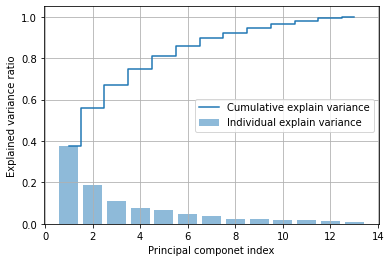

In [ ]:
# Varianza total explicada 
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='Individual explain variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative explain variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal componet index')
plt.legend(loc='best')
plt.grid()
plt.show()


**Transformación de características**

In [ ]:
# Hacer una lista de las tuplas (autovalores y autovectores)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
                       
# Ordenar las tuplas (autovalores, autoveecotes) de mayor a menor
eigen_pairs.sort(key = lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print("Matrix W: \n", w)

Matrix W: 
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [ ]:
X_train_PCA = X_train_std.dot(w)
X_train.shape

(124, 13)

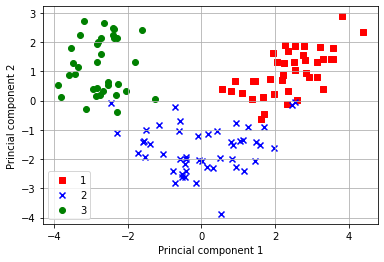

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_PCA[y_train==l, 0], X_train_PCA[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel('Princial component 1')
plt.ylabel('Princial component 2')
plt.legend()
plt.grid()
plt.show()

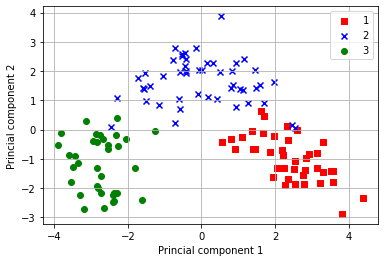

In [ ]:
#lr = LogisticRegression()

pca = PCA(n_components=2)
X_train_PCA_SK = pca.fit_transform(X_train_std)
X_test_PCA = pca.fit_transform(X_test_std)

#lr.fit(X_train_PCA, y_train)

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_PCA_SK[y_train==l, 0], X_train_PCA_SK[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel('Princial component 1')
plt.ylabel('Princial component 2')
plt.legend()
plt.grid()
plt.show()


Nota:

Las imagenes se invierten, esto debe a que los autovectores pueden tener signos tanto positivos como negativos